In [1]:
# Built-in library
import asyncio
import json
import logging
import re
import warnings
from pathlib import Path
from pprint import pprint
from typing import Any, Literal, Optional, Union

# Standard imports
import nest_asyncio
import numpy as np
import numpy.typing as npt
import pandas as pd
import polars as pl
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "white": "#FFFFFF",  # Bright white
        "info": "#00FF00",  # Bright green
        "warning": "#FFD700",  # Bright gold
        "error": "#FF1493",  # Deep pink
        "success": "#00FFFF",  # Cyan
        "highlight": "#FF4500",  # Orange-red
    }
)
console = Console(theme=custom_theme)

# Visualization
# import matplotlib.pyplot as pltife

# NumPy settings
np.set_printoptions(precision=4)

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Polars settings
pl.Config.set_fmt_str_lengths(1_000)
pl.Config.set_tbl_cols(n=1_000)

warnings.filterwarnings("ignore")

# Black code formatter (Optional)
%load_ext lab_black

# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
def go_up_from_current_directory(*, go_up: int = 1) -> None:
    """This is used to up a number of directories.

    Params:
    -------
    go_up: int, default=1
        This indicates the number of times to go back up from the current directory.

    Returns:
    --------
    None
    """
    import os
    import sys

    CONST: str = "../"
    NUM: str = CONST * go_up

    # Goto the previous directory
    prev_directory = os.path.join(os.path.dirname(__name__), NUM)
    # Get the 'absolute path' of the previous directory
    abs_path_prev_directory = os.path.abspath(prev_directory)

    # Add the path to the System paths
    sys.path.insert(0, abs_path_prev_directory)
    print(abs_path_prev_directory)

In [3]:
go_up_from_current_directory(go_up=2)
from settings import refresh_settings  # noqa: E402

settings = refresh_settings()

/Users/neidu/Desktop/Projects/Personal/My_Projects/AI-Tutorials


In [4]:
from instructor import AsyncInstructor

from schemas import GeneralResponse, ModelEnum
from utilities.client_utils import get_client

In [5]:
local_aclient: AsyncInstructor = get_client(is_remote=False)
remote_aclient: AsyncInstructor = get_client(is_remote=True)

Using mode: <Mode.JSON: 'json_mode'>
Using Ollama
Using mode: <Mode.JSON: 'json_mode'>
Using Remote


In [6]:
messages = [
    {
        "role": "system",
        "content": "<inst>/no_think You're an expert AI assstance that replies to questions. "
        "Your responses are returned in a string format only.</inst>",
    },
    {
        "role": "user",
        "content": "Tell me briefly something unique about Abeokuta.",
    },
]
model = ModelEnum.BASE_MODEL_LOCAL_2.value
response: GeneralResponse = await local_aclient.chat.completions.create(
    messages=messages,
    response_model=GeneralResponse,
    model=model,
    max_tokens=700,
    max_retries=3,
    temperature=0.0,
    seed=0,
)
print(f"Model: {model!r}")
console.log(response.content)

Model: 'qwen3:4b-q4_K_M'


[13:40:19] Abeokuta is a city in Ogun State, Nigeria, known as the 'City of Kings' due to its      ]8;id=775342;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2783297634.py\2783297634.py]8;;\:]8;id=868821;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2783297634.py#23\23]8;;\
           historical significance as a center of the Yoruba people's kingdom. It is famous for                    
           its well-preserved ancient structures, including the Oyo Kingdom's palace and the                       
           Abeokuta Fort, which played a crucial role in the British colonial era. The city is                     
           also a cultural hub, hosting traditional festivals and events that showcase Yoruba                      
           heritage.                                                                                               

In [7]:
model = ModelEnum.BASE_REMOTE_MODEL_1_7B.value

response: GeneralResponse = await remote_aclient.chat.completions.create(
    messages=messages,
    response_model=GeneralResponse,
    model=model,
    max_tokens=700,
    max_retries=5,
    temperature=0.0,
    seed=0,
)
print(f"Model: {model!r}")
console.log(response.content)

Model: 'qwen/qwen3-1.7b:free'


[13:40:22] Abeokuta is a vibrant city in Nigeria known for its rich cultural heritage, historical  ]8;id=244073;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/3821815364.py\3821815364.py]8;;\:]8;id=124293;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/3821815364.py#13\13]8;;\
           significance, and economic importance. It is a major hub for trade and commerce, and it                 
           is home to the famous Abeokuta River, which plays a vital role in the city's economy                    
           and daily life. The city is also renowned for its traditional markets, historical                       
           landmarks, and the famous Abeokuta International Airport, which serves as a key                         
           transportation hub for the region.                                                                      

In [8]:
async def llm_response(
    message: str, client: AsyncInstructor, model: str, max_tokens: int = 1_000
) -> str:
    """
    Generate an AI response using the provided message and model parameters.

    Parameters
    ----------
    message : str
        The input message to send to the AI model.
    client : AsyncInstructor
        The async client instance for making API calls.
    model : str
        The name or identifier of the AI model to use.
    max_tokens : int, optional
        Maximum number of tokens in the response, by default 1,000.

    Returns
    -------
    str
        The generated AI response content.
    """
    response: GeneralResponse = await client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "<inst>/no_think You're an expert AI assstance that "
                "replies to questions. Your responses are returned in a string format only. "
                "e.g. '</your_answer_here>' </inst>",
            },
            {
                "role": "user",
                "content": f"<user>{message}</user>",
            },
        ],
        response_model=GeneralResponse,
        model=model,
        max_tokens=max_tokens,
        max_retries=5,
        temperature=0.0,
        seed=0,
    )

    return response.content

In [9]:
await llm_response(
    message="Tell me a joke about Cercei Lannister.",
    client=local_aclient,
    model=ModelEnum.BASE_MODEL_LOCAL_2.value,
)

"Why don't Cercei Lannister ever get cold? Because she always wears a lot of layers, and no one can take the heat from her."

<hr>

### StateGraph

In [10]:
from typing import Annotated, TypedDict

from langgraph.graph import END, START, StateGraph
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
    # This appends messages instead of overwriting
    messages: Annotated[list, add_messages]


graph_builder: StateGraph = StateGraph(State)

In [12]:
nest_asyncio.apply()


def get_client_and_model() -> tuple[Annotated[AsyncInstructor, "client"], Annotated[str, "model"]]:
    """Get the local client and model configuration.

    Returns
    -------
    tuple[AsyncInstructor, str]
        A tuple containing:
        - client: The AsyncInstructor instance for local model interaction
        - model: The string identifier for the base local model
    """
    return local_aclient, ModelEnum.BASE_MODEL_LOCAL_2.value


# Add chatbot
async def chatbot(state: State) -> dict[str, Any]:
    """Process chat messages using an LLM model and return the response.

    Parameters
    ----------
    state : State
        The current state containing chat messages.

    Returns
    -------
    dict[str, Any]
        A dictionary containing the LLM response with key 'messages'.
    """
    client, model = get_client_and_model()
    response: str = await llm_response(state["messages"], client=client, model=model)
    return {"messages": response}


# (unique_name, function) when the node is called
graph_builder.add_node("chatbot", chatbot)

In [13]:
# Add entrypoint
graph_builder.add_edge(START, "chatbot")

# Compile graph
graph = graph_builder.compile()

## Visualize Graph

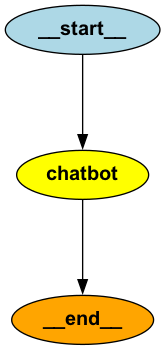

In [14]:
# uv add pygraphviz or pip install pygraphviz
from IPython.display import Image, display

display(Image(graph.get_graph().draw_png()))

### Run The Graph

In [ ]:
nest_asyncio.apply()


async def stream_graph_updates(user_input: str) -> None:
    """Process user input through a graph and stream assistant responses.

    This function takes a user input string and streams it through an async graph,
    printing the assistant's messages as they are generated.

    Parameters
    ----------
    user_input : str
        The input text from the user to process

    Returns
    -------
    None
        This function prints output but does not return any value
    """
    async for event in graph.astream({"messages": [{"role": "user", "content": user_input}]}):
        print(f"Assistant: {event['chatbot']['messages']}")

In [16]:
# Test user input
await stream_graph_updates(user_input="Tell me a joke about Cercei Lannister.")

Assistant: Why don't Cercei Lannister ever get cold? Because she always wears a lot of layers, and no one can take the heat from her!


### Test The Graph

In [17]:
while True:
    try:
        user_input: str = input("User: ")
        if user_input.lower() in ["bye", "exit", "quit", "q"]:
            print("Goodbye!")
            break
        await stream_graph_updates(user_input)

    except Exception:
        # Fallback
        user_input = "Tell me a joke about Cercei Lannister."
        print(f"User: {user_input}")
        await stream_graph_updates(user_input)
        break

Goodbye!


## Tool Use

In [18]:
from langchain_core.tools import tool
from langchain_tavily import TavilySearch
from tavily import TavilyClient


@tool("tavily_search")
def simple_tavily_search(query: str) -> dict:
    """
    Search for information using the Tavily API.

    Parameters
    ----------
    query : str
        The search query string.

    Returns
    -------
    dict
        The search results from Tavily.
    """
    tavily_client = TavilyClient(api_key=settings.TAVILY_API_KEY.get_secret_value())
    return tavily_client.search(query)

In [19]:
response = simple_tavily_search("Who is the current Pope?")
console.log(response)

/var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2400777220.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = simple_tavily_search("Who is the current Pope?")


[13:47:23] {                                                                                        ]8;id=117888;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2400777220.py\2400777220.py]8;;\:]8;id=266986;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2400777220.py#2\2]8;;\
               'query': 'Who is the current Pope?',                                                                
               'follow_up_questions': None,                                                                        
               'answer': None,                                                                                     
               'images': [],                                                                                       
               'results': [                                                                                        
                   {                                                                                               
                       'title': 'Who is the new pope? Everything to know about Pope Leo XIV',                      
                       'url':                                                                                      
           'https://www.nbcmiami.com/news/national-international/new-pope-who-is-robert-francis-pre                
           vost/3610225/',                                                                                         
                       'content': "The new leader of the Catholic Church is American Robert Francis                
           Prevost, Cardinal Dominique Mamberti announced to a crowd in St. Peter's Square.",                      
                       'score': 0.7036111,                                                                         
                       'raw_content': None                                                                         
                   },                                                                                              
                   {                                                                                               
                       'title': 'Who is the new Pope Leo XIV and what is his background?',                         
                       'url':                                                                                      
           'https://wskg.org/npr-news/2025-05-08/who-is-the-new-pope-leo-xiv-and-what-is-his-backgr                
           ound',                                                                                                  
                       'content': "The election of Robert Francis Prevost, who chose the name Leo                  
           XIV, as the 267th leader of the Roman Catholic Church marks two historic firsts. Leo is                 
           the first-ever U.S.-born pope to lead the church and the first pope from the Augustinian                
           order. On Thursday, the new pope appeared on the balcony of St. Peter's Basilica and                    
           delivered a short speech.",                                                                             
                       'score': 0.6917478,                                                                         
                       'raw_content': None                                                                         
                   },                                                                                              
                   {                                                                                               
                       'title': 'Leo XIV is the new Pope - Vatican News',                                          
                       'url':                                                                                      
           'https://www.vaticannews.va/en/pope/news/2025-05/cardinal-e

In [20]:
response["results"][0]

{'title': 'Who is the new pope? Everything to know about Pope Leo XIV',
 'url': 'https://www.nbcmiami.com/news/national-international/new-pope-who-is-robert-francis-prevost/3610225/',
 'content': "The new leader of the Catholic Church is American Robert Francis Prevost, Cardinal Dominique Mamberti announced to a crowd in St. Peter's Square.",
 'score': 0.7036111,
 'raw_content': None}

In [21]:
local_aclient: AsyncInstructor = get_client(is_remote=False, mode="tool_mode")
remote_aclient: AsyncInstructor = get_client(is_remote=True, mode="tool_mode")

Using mode: <Mode.TOOLS: 'tool_call'>
Using Ollama
Using mode: <Mode.TOOLS: 'tool_call'>
Using Remote


<hr>

## Defining Functions Following OpenAI API Spec


```json
{
    "type":"function",
    "function":{
        "name":"function_name_without_spaces",
        "description":"Description of the function",
        "parameters":{
            "type":"object",
            "properties":{
                "param_1":{
                    "type":"data_type", // string, number, array, object, null, etc
                    "description":"The description of the parameter"
                },
                "param_2":{
                    "type":"data_type",
                    "description":"The description of the parameter"
                }
            },
            "required":[
                "param_1",
                "param_2"
            ], // list all the required parameters
            "additionalProperties":false // true or false
        },
        "strict":true
    }
}
```




In [22]:
from utilities.utilities import tool as custom_tool

In [23]:
@custom_tool
def simple_adder(a: float, b: float) -> float:
    """This is used to add two numbers.

    Parameters:
    a : float
        The first number to add.
    b : float
        The second number to add.

    Returns:
    float
        The sum of the two numbers.
    """
    return a + b


console.log(simple_adder(1, 2))
console.log(simple_adder)

[13:47:31] 3                                                                                       ]8;id=765458;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2021136580.py\2021136580.py]8;;\:]8;id=954726;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2021136580.py#18\18]8;;\

           Tool(                                                                                   ]8;id=61802;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2021136580.py\2021136580.py]8;;\:]8;id=37884;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2021136580.py#19\19]8;;\
               name='simple_adder',                                                                                
               description='This is used to add two numbers.\n\n    Parameters:\n    a : float\n                   
           The first number to add.\n    b : float\n        The second number to add.\n\n                          
           Returns:\n    float\n        The sum of the two numbers.\n    ',                                        
               func=<function simple_adder at 0x11b41fc40>,                                                        
               arguments=[('a', 'float'), ('b', 'float')],                                                         
               outputs='float'                                                                                     
           )                                                                                                       

In [24]:
adder_tool: dict[str, Any] = {
    "type": "function",
    "function": {
        "name": simple_adder.name,
        "description": simple_adder.description,
        "parameters": {
            "type": "object",
            "properties": {
                "a": {
                    "type": "number",  # string, number, array, object, null, etc
                    "description": "The first number to add",
                },
                "b": {"type": "number", "description": "The second number to add"},
            },
            "required": ["a", "b"],  # list all the required parameters
            "additionalProperties": False,  # true or false
        },
        "strict": True,
    },
}

console.log(adder_tool)

[13:47:34] {                                                                                        ]8;id=637067;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/997355935.py\997355935.py]8;;\:]8;id=660780;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/997355935.py#22\22]8;;\
               'type': 'function',                                                                                 
               'function': {                                                                                       
                   'name': 'simple_adder',                                                                         
                   'description': 'This is used to add two numbers.\n\n    Parameters:\n    a :                    
           float\n        The first number to add.\n    b : float\n        The second number to                    
           add.\n\n    Returns:\n    float\n        The sum of the two numbers.\n    ',                            
                   'parameters': {                                                                                 
                       'type': 'object',                                                                           
                       'properties': {                                                                             
                           'a': {'type': 'number', 'description': 'The first number to add'},                      
                           'b': {'type': 'number', 'description': 'The second number to add'}                      
                       },                                                                                          
                       'required': ['a', 'b'],                                                                     
                       'additionalProperties': False                                                               
                   },                                                                                              
                   'strict': True                                                                                  
               }                                                                                                   
           }                                                                                                       

In [25]:
from openai import AsyncOpenAI
from pydantic import BaseModel, Field

openrouter_aclient = AsyncOpenAI(
    api_key=settings.OPENROUTER_API_KEY.get_secret_value(),
    base_url=settings.OPENROUTER_URL,
)
ollama_aclient = AsyncOpenAI(
    api_key=settings.OLLAMA_API_KEY.get_secret_value(),
    base_url=settings.OLLAMA_URL,
)

### Step 1

-  define the function using the OpenAI Function spec
-  send the query with the tools to the LLM


In [26]:
messages: list[dict[str, Any]] = [
    {
        "role": "assistant",
        "content": "<assistant>You're a helpful assistant that has access to the following tools:"
        "<tools>simple_adder</tools>. You respond to the user's queries by using the tools "
        "when necessary. Remember that the tools are meant to be used when the user asks for "
        "information that you can't provide an answer to without using a tool.</assistant>",
    },
    {
        "role": "user",
        "content": "<query>What is the sum of three and half, and 0.05?</query>",
    },
]

response = await ollama_aclient.chat.completions.create(
    messages=messages,
    model=ModelEnum.QWEN_3p0_4B_LOCAL.value,
    temperature=0.0,
    seed=0,
    tools=[adder_tool],
)
console.log(response)

[13:48:11] ChatCompletion(                                                                         ]8;id=378879;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2408939933.py\2408939933.py]8;;\:]8;id=771312;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2408939933.py#22\22]8;;\
               id='chatcmpl-689',                                                                                  
               choices=[                                                                                           
                   Choice(                                                                                         
                       finish_reason='tool_calls',                                                                 
                       index=0,                                                                                    
                       logprobs=None,                                                                              
                       message=ChatCompletionMessage(                                                              
                           content='',                                                                             
                           refusal=None,                                                                           
                           role='assistant',                                                                       
                           annotations=None,                                                                       
                           audio=None,                                                                             
                           function_call=None,                                                                     
                           tool_calls=[                                                                            
                               ChatCompletionMessageToolCall(                                                      
                                   id='call_9wrzhz7h',                                                             
                                   function=Function(                                                              
                                       arguments='{"a":3.5,"b":0.05}',                                             
                                       name='simple_adder'                                                         
                                   ),                                                                              
                                   type='function',                                                                
                                   index=0                                                                         
                               )                                                                                   
                           ]                                                                                       
                       )                                                                                           
                   )                                                                                               
               ],                                                                                                  
               created=1747486091,                                                                                 
               model='qwen3:4b-q4_K_M',                                                                            
               object='chat.completion',                                                                           
               service_tier=None,                                                                                  
               system_fingerprint='fp_ollama',                       

### Step 2

- the model decides to call the function(s)
- the model returns the name and the input arguments used.

In [27]:
# Verify that the function was called
console.log(response.choices[0].message.tool_calls)

           [                                                                                         ]8;id=492454;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/326695825.py\326695825.py]8;;\:]8;id=736585;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/326695825.py#2\2]8;;\
               ChatCompletionMessageToolCall(                                                                      
                   id='call_9wrzhz7h',                                                                             
                   function=Function(arguments='{"a":3.5,"b":0.05}', name='simple_adder'),                         
                   type='function',                                                                                
                   index=0                                                                                         
               )                                                                                                   
           ]                                                                                                       

### Step 3

- Execute the function code by passing the input arguments

In [28]:
tool_call = response.choices[0].message.tool_calls[0]
args = json.loads(tool_call.function.arguments)
result = simple_adder(a=args["a"], b=args["b"])
result

3.55

### Step 4

- supply the model with the result of the tool call (step 3) and all the previous messages
- the model returns the final response to the user

In [29]:
console.log(tool_call)

[13:48:25] ChatCompletionMessageToolCall(                                                            ]8;id=555776;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/535254525.py\535254525.py]8;;\:]8;id=39127;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/535254525.py#1\1]8;;\
               id='call_9wrzhz7h',                                                                                 
               function=Function(arguments='{"a":3.5,"b":0.05}', name='simple_adder'),                             
               type='function',                                                                                    
               index=0                                                                                             
           )                                                                                                       

In [30]:
# Add all the initial messages
messages.append(response.choices[0].message)

# Add the result of the tool/function call
messages.append(
    {
        "role": "tool",
        "tool_call_id": tool_call.id,
        "content": str(result),
    }
)

# Get final response from model with function outputs
response_2 = await ollama_aclient.chat.completions.create(
    messages=messages,
    model=ModelEnum.QWEN_3p0_4B_LOCAL.value,
    temperature=0.0,
    seed=0,
    tools=[adder_tool],
)
console.log(response_2)

[13:48:46] ChatCompletion(                                                                         ]8;id=985710;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/1492392639.py\1492392639.py]8;;\:]8;id=638976;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/1492392639.py#21\21]8;;\
               id='chatcmpl-684',                                                                                  
               choices=[                                                                                           
                   Choice(                                                                                         
                       finish_reason='stop',                                                                       
                       index=0,                                                                                    
                       logprobs=None,                                                                              
                       message=ChatCompletionMessage(                                                              
                           content="<think>\nOkay, the user is asking for the sum of three and                     
           half (which is 3.5) and 0.05. Let me add those together. 3.5 plus 0.05 equals 3.55. I                   
           should use the simple_adder function to confirm. The function takes two numbers, so                     
           I'll input 3.5 and 0.05. The result should be 3.55. Let me make sure the parameters are                 
           correct. Yep, both are floats. Alright, the tool call should return the right                           
           answer.\n</think>\n\nThe sum of three and half (3.5) and 0.05 is **3.55**.",                            
                           refusal=None,                                                                           
                           role='assistant',                                                                       
                           annotations=None,                                                                       
                           audio=None,                                                                             
                           function_call=None,                                                                     
                           tool_calls=None                                                                         
                       )                                                                                           
                   )                                                                                               
               ],                                                                                                  
               created=1747486126,                                                                                 
               model='qwen3:4b-q4_K_M',                                                                            
               object='chat.completion',                                                                           
               service_tier=None,                                                                                  
               system_fingerprint='fp_ollama',                                                                     
               usage=CompletionUsage(                                                                              
                   completion_tokens=149,                                                                          
                   prompt_tokens=322,                                                                              
                   total_tokens=471,                                                                               
                   completion_tokens_details=None,                   

In [31]:
from rich.pretty import pprint as pretty_p

print(response_2.choices[0].message.content)

<think>
Okay, the user is asking for the sum of three and half (which is 3.5) and 0.05. Let me add those together. 3.5 plus 0.05 equals 3.55. I should use the simple_adder function to confirm. The function takes two numbers, so I'll input 3.5 and 0.05. The result should be 3.55. Let me make sure the parameters are correct. Yep, both are floats. Alright, the tool call should return the right answer.
</think>

The sum of three and half (3.5) and 0.05 is **3.55**.


## Another Example

In [32]:
ollama_aclient: AsyncOpenAI = AsyncOpenAI(
    api_key=settings.OLLAMA_API_KEY.get_secret_value(),
    base_url=settings.OLLAMA_URL,
)


@custom_tool
def local_wikipedia(name: str) -> str:
    """
    Returns a string describing Chineidu, a data scientist transitioning into AI Engineering.

    Parameters
    ----------
    name : str
        The name of the data scientist.

    Returns
    -------
    str
        A string describing the data scientist.
    """
    return (
        f"{name}, AKA Tha-dude, is a data scientist who is transitioning into AI Engineering. "
        "He resides in Lagos State and he's focusing on building and deploying practical AI "
        "solutions relevant to the Nigerian context. He enjoys learning new things and "
        "developing new projects. He is currently working on a project that will help "
        "Nigerians learn how to use AI to solve their problems. "
    )


local_wikipedia_tool: dict[str, Any] = {
    "type": "function",
    "function": {
        "name": local_wikipedia.name,
        "description": local_wikipedia.description,
        "parameters": {
            "type": "object",
            "properties": {
                "name": {
                    "type": "string",  # string, number, array, object, null, etc
                    "description": "The name of the data scientist.",
                },
            },
            "required": ["name"],  # list all the required parameters
            "additionalProperties": False,  # true or false
        },
        "strict": True,
    },
}

available_functions = {
    "simple_adder": simple_adder,
    "local_wikipedia": local_wikipedia,
}
messages: list[dict[str, Any]] = [
    {
        "role": "system",
        "content": "<inst>You're a very concise helpful assistant that has access to the "
        "following tools: <tools>[simple_adder, local_wikipedia]</tools>. You **must** respond "
        "to the user's queries by using the available tools when necessary. </inst>",
    },
    {
        "role": "user",
        "content": "<query>What do you know about Chinedu?</query>",
    },
]


response = await ollama_aclient.chat.completions.create(
    messages=messages,
    model=f"{ModelEnum.QWEN_3p0_4B_LOCAL.value}",
    temperature=0.0,
    seed=0,
    tools=[adder_tool, local_wikipedia_tool],
)
console.log(response)

[13:51:16] ChatCompletion(                                                                           ]8;id=244581;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/92335864.py\92335864.py]8;;\:]8;id=910689;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/92335864.py#76\76]8;;\
               id='chatcmpl-237',                                                                                  
               choices=[                                                                                           
                   Choice(                                                                                         
                       finish_reason='tool_calls',                                                                 
                       index=0,                                                                                    
                       logprobs=None,                                                                              
                       message=ChatCompletionMessage(                                                              
                           content='',                                                                             
                           refusal=None,                                                                           
                           role='assistant',                                                                       
                           annotations=None,                                                                       
                           audio=None,                                                                             
                           function_call=None,                                                                     
                           tool_calls=[                                                                            
                               ChatCompletionMessageToolCall(                                                      
                                   id='call_5tw0tuhd',                                                             
                                   function=Function(                                                              
                                       arguments='{"name":"Chinedu"}',                                             
                                       name='local_wikipedia'                                                      
                                   ),                                                                              
                                   type='function',                                                                
                                   index=0                                                                         
                               )                                                                                   
                           ]                                                                                       
                       )                                                                                           
                   )                                                                                               
               ],                                                                                                  
               created=1747486276,                                                                                 
               model='qwen3:4b-q4_K_M',                                                                            
               object='chat.completion',                                                                           
               service_tier=None,                                                                                  
               system_fingerprint='fp_ollama',                           

In [33]:
if response.choices[0].message.tool_calls:
    # There may be multiple tool calls in the response
    for tool in response.choices[0].message.tool_calls:
        # Ensure the function is available, and then call it
        if function_to_call := available_functions.get(tool.function.name):
            args = json.loads(tool.function.arguments)
            print(f"Calling function: {tool.function.name}")
            print(f"Arguments: {args}")
            output = function_to_call.func(**args)
            print(f"Function output: {output}")
        else:
            print("Function", tool.function.name, "not found")

# Only needed to chat with the model using the tool call results
if response.choices[0].message.tool_calls:
    # Add the function response to messages for the model to use
    messages.append(response.choices[0].message)
    messages.append(
        {
            "role": "tool",
            "tool_call_id": tool.id,
            "content": str(output),
            "name": tool.function.name,
        }
    )

    # Get final response from model with function outputs
    final_response = await ollama_aclient.chat.completions.create(
        messages=messages,
        model=f"{ModelEnum.QWEN_3p0_4B_LOCAL.value}",
        temperature=0.0,
        seed=0,
        # tools=[adder_tool, local_wikipedia_tool],
    )
    console.log(f"Final response: {final_response.choices[0].message.content}")

else:
    console.log("No tool calls returned from model")

Calling function: local_wikipedia
Arguments: {'name': 'Chinedu'}
Function output: Chinedu, AKA Tha-dude, is a data scientist who is transitioning into AI Engineering. He resides in Lagos State and he's focusing on building and deploying practical AI solutions relevant to the Nigerian context. He enjoys learning new things and developing new projects. He is currently working on a project that will help Nigerians learn how to use AI to solve their problems. 


[13:52:08] Final response: <think>                                                                 ]8;id=36217;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/1790320164.py\1790320164.py]8;;\:]8;id=239693;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/1790320164.py#35\35]8;;\
           Okay, the user asked about Chinedu. Let me start by recalling the information I have.                   
           From the previous response, I know that Chinedu is a data scientist moving into AI                      
           Engineering, based in Lagos, focusing on practical AI solutions for Nigeria. He's                       
           working on a project to help Nigerians use AI to solve local problems.                                  
                                                                                                                   
           Now, the user might want more details or have follow-up questions. But since they just                  
           asked "What do you know about Chinedu?" and I already provided the answer, maybe they                   
           are satisfied. Alternatively, they might be interested in specific aspects like his                     
           projects, challenges, or how to get involved. However, the tools available are                          
           simple_adder and local_wikipedia. Since the answer was generated without using the                      
           tools, but the user's query is about general knowledge, maybe there's no need to use                    
           the tools here. Wait, but the instructions say to use the tools when necessary.                         
           However, the information provided was from the previous response, which might not have                  
           used the tools. But in this case, since the user is asking for general information and                  
           the assistant has already provided the answer, perhaps there's no need to use the tools                 
           again. Alternatively, maybe the assistant should check if there's more info via                         
           local_wikipedia. But the previous response didn't use that. Hmm. The user might be                      
           testing if the assistant knows when to use the tools. But since the answer is already                   
           given, maybe the assistant is done. So the final answer is as provided.                                 
           </think>                                                                                                
                                                                                                                   
           Chinedu is a data scientist transitioning into AI Engineering, based in Lagos, Nigeria.                 
           He focuses on developing practical AI solutions tailored to local challenges and is                     
           working on a project to empower Nigerians to use AI for problem-solving. No further                     
           tools are needed for this general overview.                                                             

In [36]:
from langchain.chat_models import init_chat_model

llm_ollama = init_chat_model(f"ollama:{ModelEnum.QWEN_3p0_4B_LOCAL.value}")

response = await llm_ollama.ainvoke("/no_think Tell me a joke about Tyrion Lannister")
console.log(response)

[13:55:22] AIMessage(                                                                               ]8;id=407550;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2021416627.py\2021416627.py]8;;\:]8;id=22500;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/2021416627.py#6\6]8;;\
               content='<think>\n\n</think>\n\nWhy did Tyrion Lannister bring a ladder to the                      
           wedding?\n\nBecause he wanted to "sit" above the rest of the crowd!',                                   
               additional_kwargs={},                                                                               
               response_metadata={                                                                                 
                   'model': 'qwen3:4b-q4_K_M',                                                                     
                   'created_at': '2025-05-17T12:55:22.541101Z',                                                    
                   'message': {'role': 'assistant', 'content': ''},                                                
                   'done_reason': 'stop',                                                                          
                   'done': True,                                                                                   
                   'total_duration': 5328912024,                                                                   
                   'load_duration': 36501855,                                                                      
                   'prompt_eval_count': 21,                                                                        
                   'prompt_eval_duration': 1040118050,                                                             
                   'eval_count': 33,                                                                               
                   'eval_duration': 4251573106                                                                     
               },                                                                                                  
               id='run--5626795b-8ee8-4e70-9d49-126978292f35-0'                                                    
           )                                                                                                       

In [37]:
llm_mistral = init_chat_model("mistralai:ministral-8b-latest")

response = await llm_mistral.ainvoke("Tell me a joke about Tyrion Lannister")
console.log(response)

[13:55:35] AIMessage(                                                                                ]8;id=181142;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/165822281.py\165822281.py]8;;\:]8;id=219642;file:///var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_39609/165822281.py#4\4]8;;\
               content="What do you call Tyrion Lannister when he's in a good mood? Tyrion                         
           Lannister.",                                                                                            
               additional_kwargs={},                                                                               
               response_metadata={                                                                                 
                   'token_usage': {                                                                                
                       'prompt_tokens': 13,                                                                        
                       'total_tokens': 37,                                                                         
                       'completion_tokens': 24                                                                     
                   },                                                                                              
                   'model_name': 'ministral-8b-latest',                                                            
                   'model': 'ministral-8b-latest',                                                                 
                   'finish_reason': 'stop'                                                                         
               },                                                                                                  
               id='run--b67fac86-5a84-4cdd-8176-265f76dc9130-0',                                                   
               usage_metadata={'input_tokens': 13, 'output_tokens': 24, 'total_tokens': 37}                        
           )                                                                                                       

In [40]:
tools: list[callable] = [TavilySearch(max_results=2)]


async def chatbot(state: State) -> dict[str, Any]:
    """A chatbot that uses Mistral to generate responses."""
    response = await llm_mistral.ainvoke(state["messages"])
    return {"messages": [response]}

### Another AI Workflow

In [ ]:
graph_builder = StateGraph(State)

# Tell the llm which tools to use
llm_mistral.bind_tools(tools)


### Add Function To Run The Tools

In [ ]:
from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs thetools requested in the last AIMessage."""

    def __init__(self, tools: list[callable]) -> None:
        self.tools_by_name: dict[str, Any] = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict[str, Any]) -> dict[str, Any]:
        """Run the tools requested in the last AIMessage."""
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")

        outputs: list[Any] = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(tool_call["args"])
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )

        return {"messages": outputs}

In [ ]:
graph_builder.add_node("chatbot", chatbot)

tool_node = BasicToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

#### Define Conditional Edges


In [44]:
def route_tools(state: State) -> str:
    """
    Determine the routing of tools based on the input state.

    Parameters:
        state (State): The input state containing messages or a list of messages.

    Returns:
        str: The routing of tools, either "tools" or END.

    Raises:
        ValueError
            If no message is found in the input state.

    Notes:
        This function checks the last message in the input state for tool calls.
        If tool calls are found, it returns "tools", otherwise it returns END.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No message found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END

In [ ]:
graph_builder.add_conditional_edges("chatbot", route_tools, {"tools": "tools", END: END})

graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

graph = graph_builder.compile()

## Visualize Graph

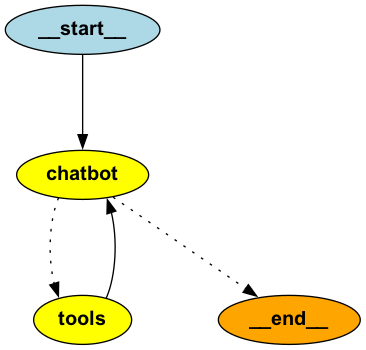

In [46]:
display(Image(graph.get_graph().draw_png()))

### Ask The Bot Qs

In [ ]:
async def stream_graph_updates(user_input: str) -> None:
    """
    Stream graph updates asynchronously based on user input.

    Parameters:
        user_input : str
            The user's input to be sent to the graph.

    Returns:
        None
    """
    async for event in graph.astream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print(f"Assistant: {value['messages'][-1].content}")

In [48]:
while True:
    try:
        user_input: str = input("User: ")
        if user_input.lower() in ["bye", "exit", "quit", "q"]:
            print("Goodbye!")
            break
        await stream_graph_updates(user_input)

    except Exception:
        # Fallback
        user_input = "Tell me a joke about Cercei Lannister."
        print(f"User: {user_input}")
        await stream_graph_updates(user_input)
        break

Assistant: Hello! How can I assist you today?
Assistant: The current Pope is Pope Francis. He was elected on March 13, 2013, and is the 266th Pope of the Catholic Church. His full name is Jorge Mario Bergoglio, and he is the first Pope from the Americas.
Goodbye!


## AI Workflow With Tools (Using Langgraph Prebuilts)

- `ToolNode` replaces the `BasicToolNode`.
- `tools_condition` replaces `route_tools`
- These prebuilts have builtin functionality like `parallel` API execution.

In [50]:
from langgraph.prebuilt import ToolNode, tools_condition

In [51]:
llm_mistral = init_chat_model("mistralai:ministral-8b-latest")
tools: list[callable] = [TavilySearch(max_results=2)]
llm_with_tools = llm_mistral.bind_tools(tools)


async def chatbot(state: State) -> dict[str, Any]:
    """A chatbot that uses Mistral to generate responses."""
    response = await llm_with_tools.ainvoke(state["messages"])
    return {"messages": [response]}

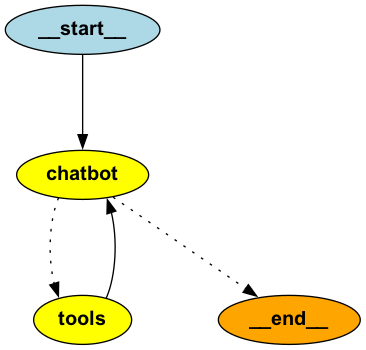

In [57]:
graph_builder = StateGraph(State)

tool_node = ToolNode(tools=tools)

# Add nodes
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", tool_node)

# Connect nodes
graph_builder.add_edge(START, "chatbot")
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,  # this maps to `tools` or `END`
)
# Anytime a tool is called, route the response back to chatbot
graph_builder.add_edge("tools", "chatbot")

graph = graph_builder.compile()


# Display the graph
display(Image(graph.get_graph().draw_png()))

In [58]:
async def stream_graph_updates(user_input: str) -> None:
    """
    Stream graph updates asynchronously based on user input.

    Parameters:
        user_input : str
            The user's input to be sent to the graph.

    Returns:
        None
    """
    async for event in graph.astream(
        {"messages": [{"role": "user", "content": user_input}]}
    ):
        for value in event.values():
            print(f"Assistant: {value['messages'][-1].content}")

In [59]:
while True:
    try:
        user_input: str = input("User: ")
        if user_input.lower() in ["bye", "exit", "quit", "q"]:
            print("Goodbye!")
            break
        await stream_graph_updates(user_input)

    except Exception:
        # Fallback
        user_input = "Tell me a joke about Cercei Lannister."
        print(f"User: {user_input}")
        await stream_graph_updates(user_input)
        break

Assistant: Hello! How can I assist you today?
Assistant: 
Assistant: {"query": "Who is the current Pope?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Who is the new Pope Leo XIV and what is his background?", "url": "https://wskg.org/npr-news/2025-05-08/who-is-the-new-pope-leo-xiv-and-what-is-his-background", "content": "The election of Robert Francis Prevost, who chose the name Leo XIV, as the 267th leader of the Roman Catholic Church marks two historic firsts. Leo is the first-ever U.S.-born pope to lead the church and the first pope from the Augustinian order. On Thursday, the new pope appeared on the balcony of St. Peter's Basilica and delivered a short speech.", "score": 0.6917478, "raw_content": null}, {"title": "Who is Pope Leo XIV, and how was he chosen? | Temple Now", "url": "https://news.temple.edu/news/2025-05-14/who-pope-leo-xiv-and-how-was-he-chosen", "content": "Pope Leo XIV is the first pope from the United States, and he joins his p

In [ ]:
from typing import Any, TypedDict, Annotated
from openai import AsyncOpenAI
from pydantic import BaseModel, Field
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import (
    AIMessage,
    AnyMessage,
    HumanMessage,
    SystemMessage,
    ToolMessage,
)

# LLM Client
client = AsyncOpenAI(
    api_key=settings.OPENROUTER_API_KEY.get_secret_value(),
    base_url=settings.OPENROUTER_URL,
)


# State type
class MessageState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


# For pydantic-style structured response if needed
class Message(BaseModel):
    name: str = Field(description="Name of the user")
    role: str = Field(description="Role of the user")


# Core LLM call using OpenAI SDK
async def achat_completion(messages: list[dict[str, str]], model: str) -> str:
    response = await client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0.0,
        max_tokens=500,
        seed=1,
    )
    return response.choices[0].message.content


def format_messages(messages: list[Any]) -> list[dict[str, str]]:
    formatted = []
    for msg in messages:
        if isinstance(msg, SystemMessage):
            formatted.append({"role": "system", "content": msg.content})
        elif isinstance(msg, str):
            formatted.append({"role": "user", "content": msg})
        elif isinstance(msg, dict):
            formatted.append(msg)  # Allow for raw dict messages
    return formatted


# Agent function
async def chatbot(state: MessageState) -> dict[str, Any]:
    raw_messages: list[Any] = [
        SystemMessage(content="You are a helpful assistant.")
    ] + state["messages"]
    messages = format_messages(raw_messages)

    response_text = await achat_completion(
        messages=messages, model=ModelEnum.LLAMA_3p2_3B_INSTRUCT_REMOTE.value
    )
    return {"messages": [AIMessage(content=response_text)]}


# Build graph
graph_builder = StateGraph(MessageState)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

# Memory and execution
within_thread_memory = MemorySaver()
graph = graph_builder.compile(checkpointer=within_thread_memory).with_config(
    run_name="simple-chatbot"
)

# Run the graph
input_msg = ["My name is Neidu. I am a software developer."]
config = {"configurable": {"thread_id": "1"}}


async def run_chat(input_msg):
    async for event in graph.astream(
        {"messages": input_msg}, config=config, stream_mode="values"
    ):
        for m in event["messages"]:
            m.pretty_print()


# Example usage
# await run_chat(["How can I create AI agentic workflows?"])